# Project - Ensemble Technique

Obective: The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [200]:
#data processing package import
import pandas as pd
import numpy as np

#model builer pacakge import
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 1. Reading and Checking the Data

In [201]:
#Read Data
df_bank1=pd.read_csv("bank-full.csv")

In [202]:
df_bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [203]:
# Shape of the dataframe (Rows, Column)
df_bank1.shape
print(f"Shape of data: {df_bank1.shape}")
print(f"Number of rows:= {df_bank1.shape[0]}")
print(f"Number of Columns:= {df_bank1.shape[1]}")
#d1.shape[1]

Shape of data: (45211, 17)
Number of rows:= 45211
Number of Columns:= 17


In [204]:
#Data type of each attribute
df_bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# # Data Type and Null Value detection

In [205]:
#checking Null columns
d1_null=df_bank1.isnull().sum()
d1_null

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [206]:
# five point summary of numerical data types
df_bank1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# # Five Point summary inference

In [207]:
# Undertanding variables of type Object to futher process them and replace with numeric values
job_values=df_bank1.job.unique()
print("Job_type:\n",job_values)
#print("\n")

marital_values=df_bank1.marital.unique()
print("Marital_Status:\n",marital_values)
#print("\n")

edu_values=df_bank1.education.unique()
print("Education Types:\n",edu_values)
#print("\n")

default_values=df_bank1.default.unique()
print("Credit Default Status:\n",default_values)
#print("\n")

housing_values=df_bank1.housing.unique()
print("Housing Loan:\n",housing_values)
#print("\n")

contact_values=df_bank1.contact.unique()
print("contact communication type:\n",contact_values)
#print("\n")

poutcome_values=df_bank1.poutcome.unique()
print("Outcome-Previous Campaign:\n",poutcome_values)
#print("\n")

Job_type:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital_Status:
 ['married' 'single' 'divorced']
Education Types:
 ['tertiary' 'secondary' 'unknown' 'primary']
Credit Default Status:
 ['no' 'yes']
Housing Loan:
 ['yes' 'no']
contact communication type:
 ['unknown' 'cellular' 'telephone']
Outcome-Previous Campaign:
 ['unknown' 'failure' 'other' 'success']


In [208]:
# Creating another dataset from the main data for data processing and model building
df_bank2=df_bank1

In [209]:
df_bank2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [210]:
# Replace varaible of object type with numeric category


df_bank2['job']=df_bank2['job'].replace({"management":1,"technician":2,"entrepreneur":3,"blue-collar":4,
                                        "retired":5,"admin.":6,"services":7,"self-employed":8,"unemployed":9,
                                         "housemaid":10,"student":11,"unknown":0})

df_bank2['marital']=df_bank2['marital'].replace({"married":1,"single":2,"divorced":3})

df_bank2['education']=df_bank2['education'].replace({"primary":1,"secondary":2,"tertiary":3,"unknown":0})

df_bank2['loan']=df_bank2['loan'].replace({"yes":1,"no":0})

df_bank2['default']=df_bank2['default'].replace({"yes":1,"no":0})

df_bank2['housing']=df_bank2['housing'].replace({"yes":1,"no":0})

df_bank2['contact']=df_bank2['contact'].replace({"cellular":1,"telephone":2,"unknown":0})

df_bank2['month']=df_bank2['month'].replace({"jan":1,"feb":2,"mar":4,"apr":4,"may":5,"jun":6,
                                            "jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})

df_bank2['poutcome']=df_bank2['poutcome'].replace({"success":1,"failure":2,"other":3,"unknown":0})

df_bank2['Target']=df_bank2['Target'].replace({"yes":1,"no":0})

In [211]:
df_bank2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,1,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,2,2,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,3,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,4,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,0,2,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [212]:
# Negative value as -1 observed in pdays column
# Treating negative value in pdays. To get rid of negative value added 1 to to all values in pdays column 
df_bank2['pdays']+=1

In [213]:
df_bank2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,1,1,3,0,2143,1,0,0,5,5,261,1,0,0,0,0
1,44,2,2,2,0,29,1,0,0,5,5,151,1,0,0,0,0
2,33,3,1,2,0,2,1,1,0,5,5,76,1,0,0,0,0
3,47,4,1,0,0,1506,1,0,0,5,5,92,1,0,0,0,0
4,33,0,2,0,0,1,0,0,0,5,5,198,1,0,0,0,0


In [214]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null int64
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null int64
dtypes: int64(17)
memory usage: 5.9 MB


In [215]:
# converting the Features to appropriate data type . 
# Though we can create models with int data type, still it is recomeended to convert variable to approtite data type

df_bank2['job']=df_bank2['job'].astype('category')
df_bank2['marital']=df_bank2['marital'].astype('category')
df_bank2['education']=df_bank2['education'].astype('category')
df_bank2['default']=df_bank2['default'].astype('category')
df_bank2['housing']=df_bank2['housing'].astype('category')
df_bank2['loan']=df_bank2['loan'].astype('category')
df_bank2['contact']=df_bank2['contact'].astype('category')
df_bank2['month']=df_bank2['month'].astype('category')
df_bank2['poutcome']=df_bank2['poutcome'].astype('category')
df_bank2['Target']=df_bank2['Target'].astype('category')

In [216]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# EDA

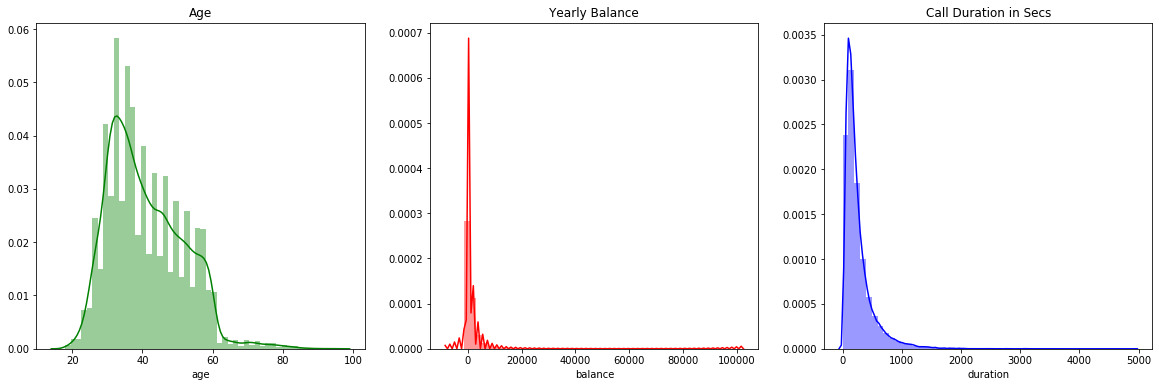

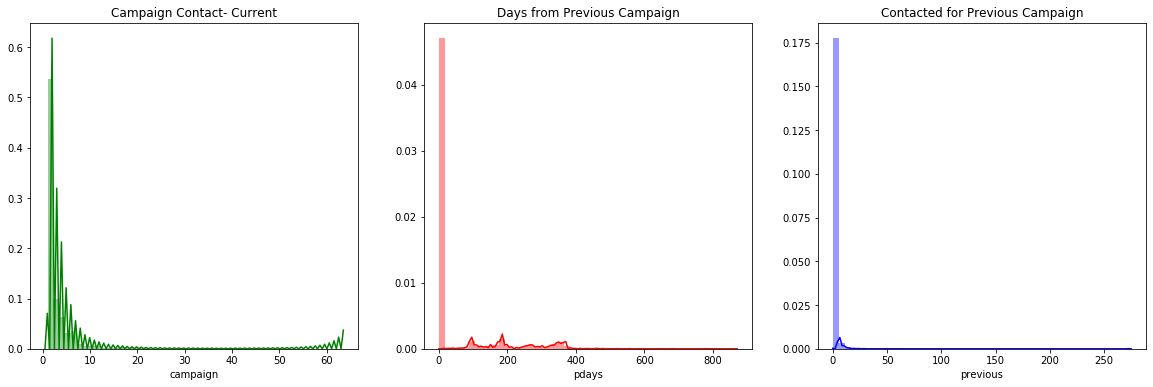

In [217]:
# Univariate analysis - distplot

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Age')
sns.distplot(df_bank2['age'],color='green')

plt.subplot(1,3,2)
plt.title('Yearly Balance')
sns.distplot(df_bank2['balance'],color='red')

plt.subplot(1,3,3)
plt.title('Call Duration in Secs')
sns.distplot(df_bank1['duration'],color='blue')

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Campaign Contact- Current')
sns.distplot(df_bank2['campaign'],color='green')

plt.subplot(1,3,2)
plt.title('Days from Previous Campaign')
sns.distplot(df_bank2['pdays'],color='red')

plt.subplot(1,3,3)
plt.title('Contacted for Previous Campaign')
sns.distplot(df_bank2['previous'],color='blue')

In [332]:
#df_bank2['balance'].mean()
#df_bank2['balance'].median()
df_bank2['balance'].mode()

0    0
dtype: int64

# # Understanding distribution of Numeric variables

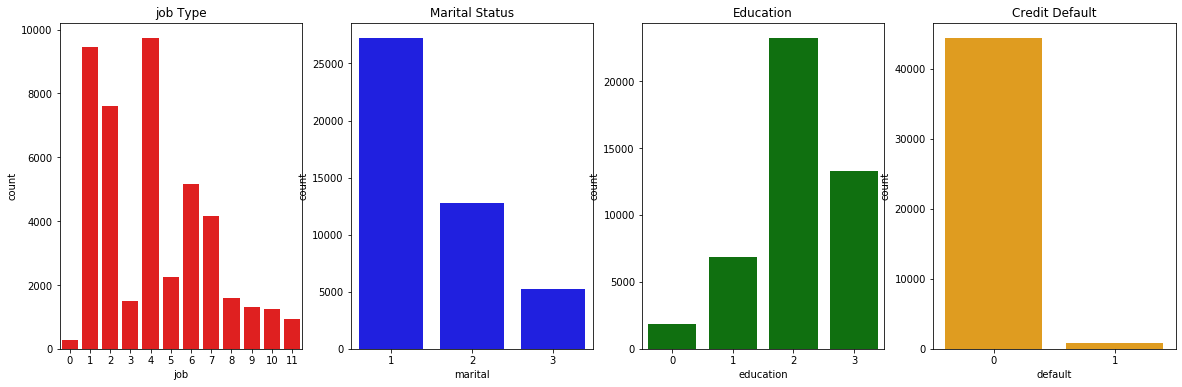

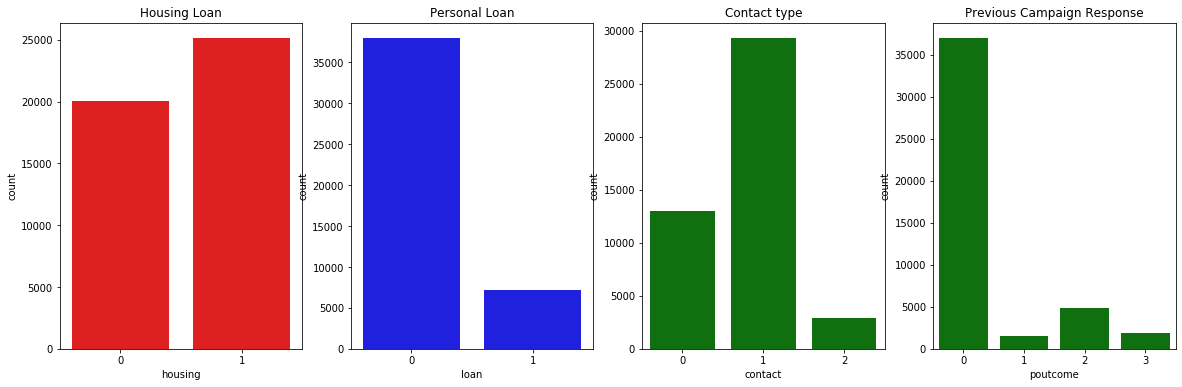

In [333]:
# Count for categorical columns
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.title('job Type')
sns.countplot(df_bank1['job'],orient='vertical',color='red')

plt.subplot(1,4,2)
plt.title('Marital Status')
sns.countplot(df_bank1['marital'],orient='vertical',color='blue')

plt.subplot(1,4,3)
plt.title('Education')
sns.countplot(df_bank1['education'],orient='vertical',color='green')

plt.subplot(1,4,4)
plt.title('Credit Default')
sns.countplot(df_bank1['default'],orient='vertical',color='orange')

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.title('Housing Loan')
sns.countplot(df_bank1['housing'],orient='vertical',color='red')

plt.subplot(1,4,2)
plt.title('Personal Loan')
sns.countplot(df_bank1['loan'],orient='vertical',color='blue')

plt.subplot(1,4,3)
plt.title('Contact type')
sns.countplot(df_bank1['contact'],orient='vertical',color='green')

plt.subplot(1,4,4)
plt.title('Previous Campaign Response')
sns.countplot(df_bank1['poutcome'],orient='vertical',color='green')

# # Undestanding the categorical variable

# Understanding the Target Column- Term Deposit

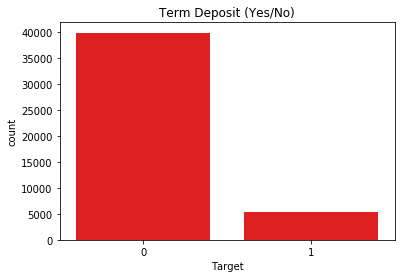

In [219]:
plt.title('Term Deposit (Yes/No)')
sns.countplot(df_bank1['Target'],orient='vertical',color='red')

In [220]:
# check for data imbalance
prop_Y = df_bank2['Target'].value_counts(normalize=True)
print(prop_Y)

0    0.883015
1    0.116985
Name: Target, dtype: float64


# # Infering Class Imbalance in Target Label

In [221]:
pd.pivot_table(df_bank2,index='Target')

,age,balance,campaign,day,duration,pdays,previous
Target,,,,,,,
0,40.838986,1303.714969,2.846350,15.892290,221.182806,37.421372,0.502154
1,41.670070,1804.267915,2.141047,15.158253,537.294574,69.702968,1.170354


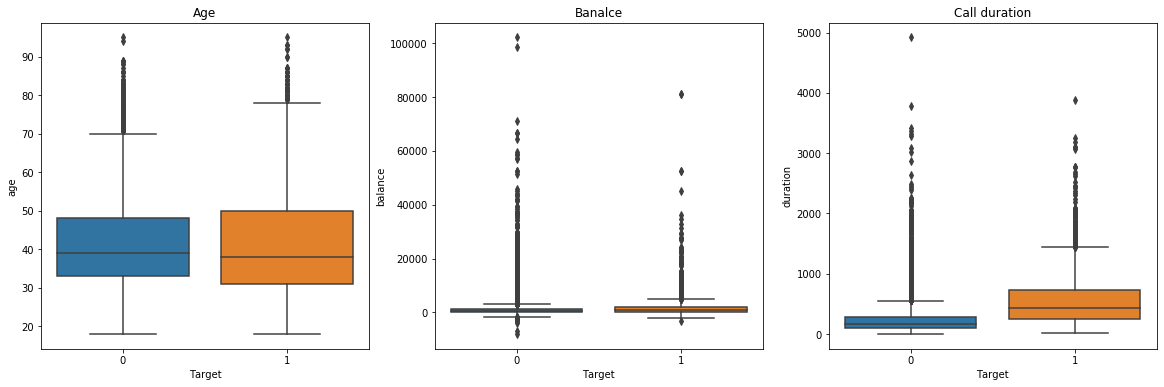

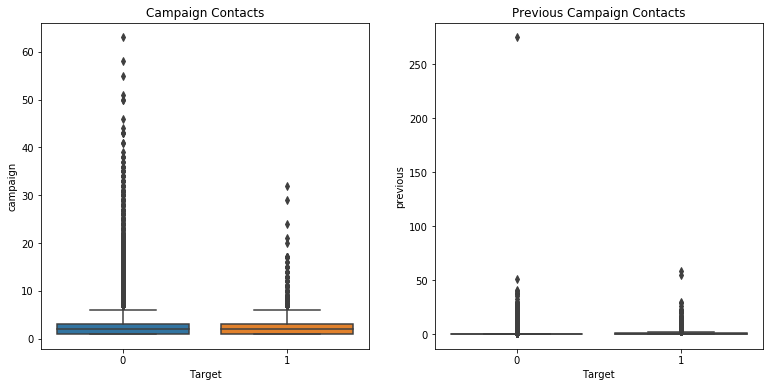

In [222]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Age')
sns.boxplot(x='Target',y='age',data=df_bank1)

plt.subplot(1,3,2)
plt.title('Banalce')
sns.boxplot(x='Target',y='balance',data=df_bank1)

plt.subplot(1,3,3)
plt.title('Call duration')
sns.boxplot(x='Target',y='duration',data=df_bank1)

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Campaign Contacts')
sns.boxplot(x='Target',y='campaign',data=df_bank1)

plt.subplot(1,3,2)
plt.title('Previous Campaign Contacts')
sns.boxplot(x='Target',y='previous',data=df_bank1)

# # Inferences from BOXPLOT

In [223]:
pd.crosstab(df_bank1['Target'],df_bank1['previous'], dropna=False)

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
Target,,,,,,,,,,,,,,,,,,,,,
0,33570,2189,1650,848,543,338,194,151,90,68,...,1,1,2,2,1,1,1,0,0,1
1,3384,583,456,294,171,121,83,54,39,24,...,0,0,0,0,0,0,0,1,1,0


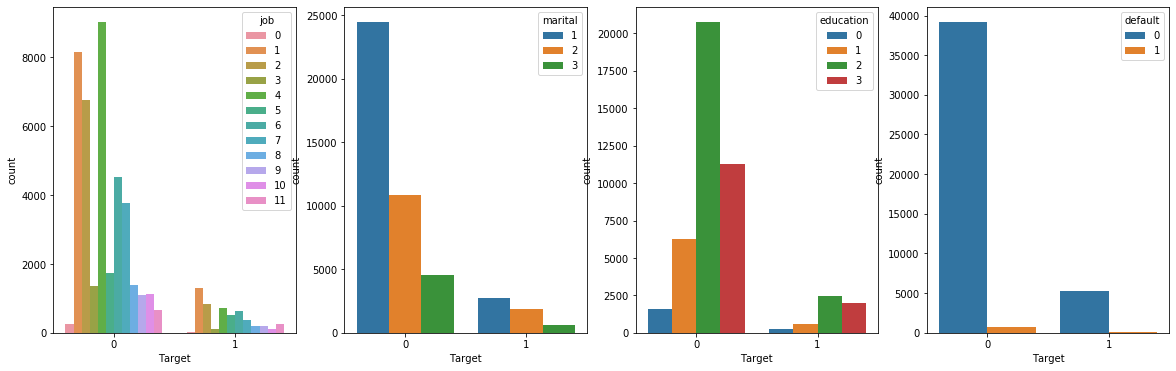

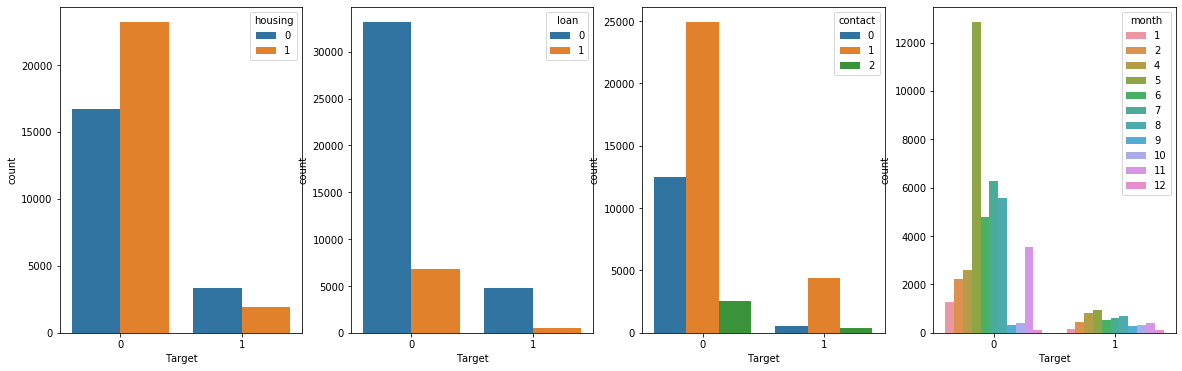

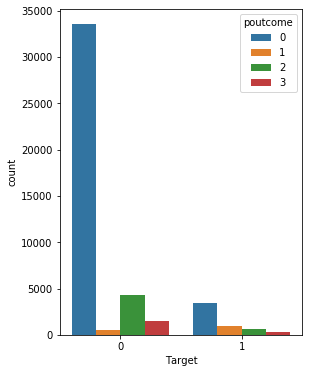

In [224]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.countplot(x='Target',hue='job',data=df_bank2)

plt.subplot(1,4,2)
sns.countplot(x='Target',hue='marital',data=df_bank2)

plt.subplot(1,4,3)
sns.countplot(x='Target',hue='education',data=df_bank2)

plt.subplot(1,4,4)
sns.countplot(x='Target',hue='default',data=df_bank2)

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.countplot(x='Target',hue='housing',data=df_bank2)

plt.subplot(1,4,2)
sns.countplot(x='Target',hue='loan',data=df_bank2)

plt.subplot(1,4,3)
sns.countplot(x='Target',hue='contact',data=df_bank2)

plt.subplot(1,4,4)
sns.countplot(x='Target',hue='month',data=df_bank2)

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.countplot(x='Target',hue='poutcome',data=df_bank2)


In [225]:
#Group by 
df_bank2.groupby(["Target"]).mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,37.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,69.702968,1.170354


In [226]:
df_bank2.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [227]:
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

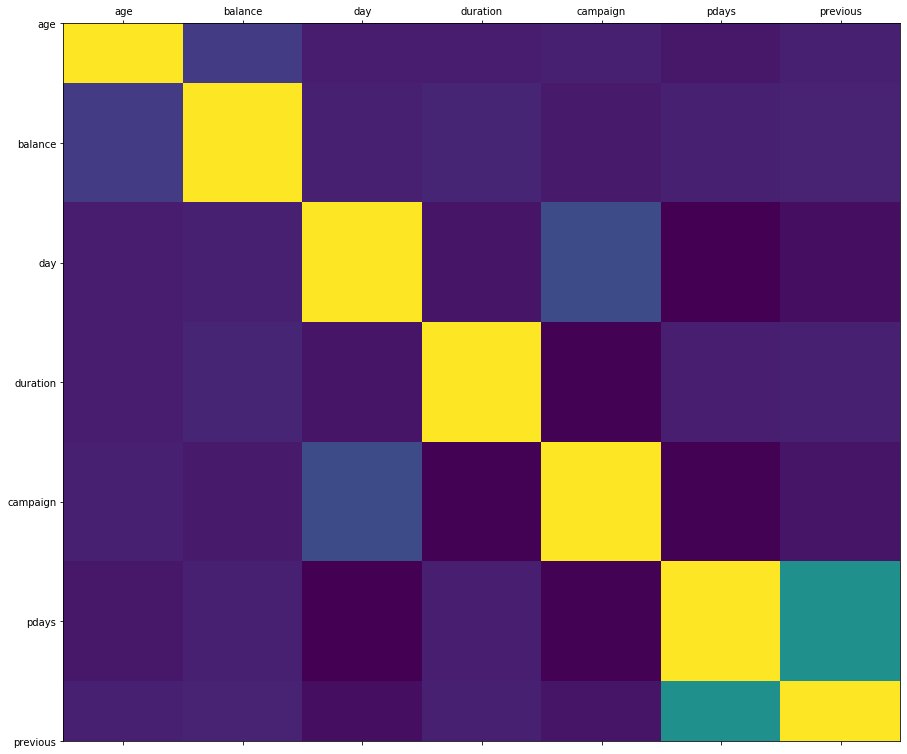

In [228]:
plot_corr(df_bank2)

In [229]:
df_bank2['Target']=df_bank2['Target'].astype('int64')

n_true = len(df_bank2.loc[df_bank2['Target'] == True])
n_false = len(df_bank2.loc[df_bank2['Target'] == False])
print("Customers subscribed for Term Deposit: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Customers Not subscribed for Term Deposit: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Customers subscribed for Term Deposit: 5289 (11.70%)
Customers Not subscribed for Term Deposit: 39922 (88.30%)


In [230]:
df_bank2['Target']=df_bank2['Target'].astype('category')

# Model Building

In [234]:
df_bank3.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,1,1,3,0,2143,1,0,0,5,5,261,1,0,0,0,0


In [235]:
df_bank2=df_bank2.drop("day",axis=1)

# day is being dropped as it is calendar date and may not be approriate feature for Model building

In [291]:
df_bank4=df_bank3
df_bank4=df_bank4.drop("day",axis=1)
df_bank4=df_bank4.drop("duration",axis=1)

In [292]:
df_bank4.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,Target
0,58,1,1,3,0,2143,1,0,0,5,1,0,0,0,0
1,44,2,2,2,0,29,1,0,0,5,1,0,0,0,0


In [290]:
df_bank2.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,58,1,1,3,0,2143,1,0,0,5,261,1,0,0,0
1,44,2,2,2,0,29,1,0,0,5,151,1,0,0,0


In [236]:
X = df_bank2.drop("Target" , axis=1)
y = df_bank2.pop("Target")

In [293]:
X_D4 = df_bank4.drop("Target" , axis=1)         # duration has been removed in this set to test impact of duration on model
y_D4 = df_bank4.pop("Target")

In [237]:
X.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,58,1,1,3,0,2143,1,0,0,5,261,1,0,0,0
1,44,2,2,2,0,29,1,0,0,5,151,1,0,0,0


# Splitting the data

In [238]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [294]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_D4, y_D4, test_size=.30)

# A. Building Decision Tree Model

In [252]:
dTree = DecisionTreeClassifier(criterion = 'entropy')
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [295]:
dTree_D4 = DecisionTreeClassifier(criterion = 'entropy')
dTree_D4.fit(X_train_4, y_train_4)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [337]:
# Decision Tree Scores
print("dTree-All feature-Train:",dTree.score(X_train, y_train))
print("dTree-All feature-Test:",dTree.score(X_test, y_test))

print("\n")
print("Dtree- Duration dropped-Train ",dTree_D4.score(X_train_4, y_train_4))
print("Dtree- Duration dropped-Train",dTree_D4.score(X_test_4, y_test_4))

dTree-All feature-Train: 1.0
dTree-All feature-Test: 0.8702447655558833


Dtree- Duration dropped-Train  0.9998104085695326
Dtree- Duration dropped-Train 0.8268947213211442


# # Feature selection

In [365]:
# Predit for train
pred_test = dTree.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
matrix_train = confusion_matrix(y_train,pred_test)
print("confusion matrix = \n",matrix_train,"\n")
matrix_train = classification_report(y_train,pred_test)
print("classification_report = \n",matrix_train)

confusion matrix = 
 [[27969     0]
 [    0  3678]] 

classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27969
           1       1.00      1.00      1.00      3678

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



In [338]:
# Predit for test- Decision Tree
pred_test = dTree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
matrix_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",matrix_test,"\n")
matrix_test = classification_report(y_test,pred_test)
print("classification_report = \n",matrix_test)

confusion matrix = 
 [[11058   895]
 [  865   746]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11953
           1       0.45      0.46      0.46      1611

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



In [345]:
pred_test_DT = dTree.predict(X_test)

DT_acc=accuracy_score(y_test,pred_test_DT)
DT_pre=precision_score(y_test,pred_test_DT)
DT_rec=recall_score(y_test,pred_test_DT)
DT_F1=2*((DT_pre*DT_rec)/(DT_pre+DT_rec))

print("\n")
print("DTREE Score Comparison for Test Data")
print("DTREE- Accuracy  :",DT_acc)
print("DTREE- Precision :",DT_pre)
print("DTREE- Recall    :",DT_rec)
print("DTREE- F1 Score  :",DT_F1)



DTREE Score Comparison for Test Data
DTREE- Accuracy  : 0.8702447655558833
DTREE- Precision : 0.45460085313833026
DTREE- Recall    : 0.46306641837368095
DTREE- F1 Score  : 0.4587945879458794


# B. Logistic Model

In [264]:
from sklearn.linear_model import LogisticRegression

#Building Model:1- the logistic Regression model- 
logisticRegr = LogisticRegression()
lg=logisticRegr.fit(X_train, y_train)

C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [297]:
from sklearn.linear_model import LogisticRegression

#Building Model:1- the logistic Regression model- 
logisticRegr_4 = LogisticRegression()
lg_4=logisticRegr_4.fit(X_train_4, y_train_4)

C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [343]:
# Predit for test- Logistic Regression
pred_test = logisticRegr.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
matrix_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",matrix_test,"\n")
matrix_test = classification_report(y_test,pred_test)
print("classification_report = \n",matrix_test)

confusion matrix = 
 [[11778   175]
 [ 1302   309]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11953
           1       0.64      0.19      0.29      1611

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564



In [346]:
# Score 

pred_test_LG = logisticRegr.predict(X_test)

LG_acc=accuracy_score(y_test,pred_test_LG)
LG_pre=precision_score(y_test,pred_test_LG)
LG_rec=recall_score(y_test,pred_test_LG)
LG_F1=2*((LG_pre*LG_rec)/(LG_pre+LG_rec))

print("\n")
print("LOGISTIC Score Comparison for Test Data")
print("Logistics- Accuracy  :",LG_acc)
print("Logistics- Precision :",LG_pre)
print("Logistics- Recall    :",LG_rec)
print("Logistics- F1 Score  :",LG_F1)



LOGISTIC Score Comparison for Test Data
Logistics- Accuracy  : 0.891108817457977
Logistics- Precision : 0.6384297520661157
Logistics- Recall    : 0.19180633147113593
Logistics- F1 Score  : 0.29498806682577566


In [298]:
# Use score method to get accuracy of model
LG_Score = logisticRegr.score(X_test, y_test)
print(LG_Score)
print("\n")
LG_Score_4 = logisticRegr_4.score(X_test_4, y_test_4)
print(LG_Score_4)

0.891108817457977


0.8784281922736655


# C. KNN Model

In [270]:
# converting the features into z scores since our data has different units. 
# For KNN Modelling data need to be in same scale and need to be normalized
# It is always adviced to scale numeric attributes in models that calculate distances.
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,6.234662e-15,-1.647804e-15,1.573149e-14,4.520540e-15,3.070663e-15,1.382298e-14,-1.275129e-14,1.457015e-13,-3.487254e-14,5.560938e-17,1.254699e-14,-1.395817e-13,1.355210e-13,-1.410292e-13
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-1.527989e+00,-7.406664e-01,-2.646114e+00,-1.354899e-01,-3.081149e+00,-1.118674e+00,-4.368035e-01,-1.412108e+00,-2.151257e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,-4.467054e-01
25%,-7.473845e-01,-7.873310e-01,-7.406664e-01,-7.771493e-02,-1.354899e-01,-4.237719e-01,-1.118674e+00,-4.368035e-01,-1.412108e+00,-4.820650e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,-4.467054e-01
50%,-1.823406e-01,-4.667303e-02,-7.406664e-01,-7.771493e-02,-1.354899e-01,-3.002800e-01,8.939154e-01,-4.368035e-01,4.069312e-01,-6.476699e-02,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01,-4.467054e-01
75%,6.652252e-01,6.939849e-01,7.024584e-01,1.206484e+00,-1.354899e-01,2.158743e-02,8.939154e-01,-4.368035e-01,4.069312e-01,7.698291e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,-4.467054e-01
max,5.091402e+00,2.545630e+00,2.145583e+00,1.206484e+00,7.380625e+00,3.309478e+01,8.939154e-01,2.289359e+00,2.225971e+00,2.439021e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02,3.152653e+00


In [271]:
X_KNNtrain, X_KNNtest, Y_KNNtrain, Y_KNNtest = train_test_split(XScaled, y, test_size=0.30)
#X_KNNtrain, X_KNNtest, Y_KNNtrain, Y_KNNtest = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [299]:
XScaled_D4  = X_D4.apply(zscore)
X_KNNtrain_D4, X_KNNtest_D4, Y_KNNtrain_D4, Y_KNNtest_D4 = train_test_split(XScaled_D4, y_D4, test_size=0.30)

In [273]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

# Call Nearest Neighbour algorithm

NNH.fit(X_KNNtrain, Y_KNNtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [300]:
NNH_D4 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

# Call Nearest Neighbour algorithm

NNH_D4.fit(X_KNNtrain_D4, Y_KNNtrain_D4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [301]:
predicted_labels = NNH.predict(X_KNNtest)
KNN_Score=NNH.score(X_KNNtest, Y_KNNtest)
print(KNN_Score)

predicted_labels_D4 = NNH_D4.predict(X_KNNtest_D4)
KNN_Score_D4=NNH_D4.score(X_KNNtest_D4, Y_KNNtest_D4)
print(KNN_Score_D4)

0.891108817457977
0.8779858448835152


In [364]:
# Predit for test- KNN MODEL
pred_test = NNH.predict(X_KNNtest)

from sklearn.metrics import classification_report,confusion_matrix
matrix_test = confusion_matrix(Y_KNNtest,pred_test)
print("confusion matrix = \n",matrix_test,"\n")
matrix_test = classification_report(Y_KNNtest,pred_test)
print("classification_report = \n",matrix_test)

confusion matrix = 
 [[11560   424]
 [ 1053   527]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     11984
           1       0.55      0.33      0.42      1580

    accuracy                           0.89     13564
   macro avg       0.74      0.65      0.68     13564
weighted avg       0.87      0.89      0.88     13564



In [348]:
pred_test_KNN = NNH.predict(X_KNNtest)

KNN_acc=accuracy_score(Y_KNNtest,pred_test_KNN)
KNN_pre=precision_score(Y_KNNtest,pred_test_KNN)
KNN_rec=recall_score(Y_KNNtest,pred_test_KNN)
KNN_F1=2*((KNN_pre*KNN_rec)/(KNN_pre+KNN_rec))

print("\n")
print("KNN Score Comparison for Test Data")
print("KNN- Accuracy  :",KNN_acc)
print("KNN- Precision :",KNN_pre)
print("KNN- Recall    :",KNN_rec)
print("KNN- F1 Score  :",KNN_F1)



KNN Score Comparison for Test Data
KNN- Accuracy  : 0.891108817457977
KNN- Precision : 0.5541535226077813
KNN- Recall    : 0.33354430379746836
KNN- F1 Score  : 0.41643619122876335


# # Comparing the Classification Models

# Ensemle Technique for improving model performance

# Ensemble Learning - Bagging 

In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
dtypes: category(9), int64(7)
memory usage: 2.8 MB


In [191]:
#df_bank2=df_bank2.pop("Target")            #For ensemble, we do not need training and test data separately. 
                                           # bagging can use out of bag records for testing        

In [306]:
#Model Names
#1. Decision Tree=dTree
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dTree,n_estimators=50, max_samples=.8 , oob_score=True)

bgcl = bgcl.fit(df_bank2, y)
print(bgcl.oob_score_)

0.900444582070735


In [355]:
# Predit for test
pred_test = bgcl.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test,"\n")
mat_test = classification_report(y_test,pred_test)
print("classification_report = \n",mat_test)

confusion matrix = 
 [[11652   301]
 [ 1605     6]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     11953
           1       0.02      0.00      0.01      1611

    accuracy                           0.86     13564
   macro avg       0.45      0.49      0.47     13564
weighted avg       0.78      0.86      0.82     13564



In [358]:
#2. Bagging with Logistic Regression
from sklearn.ensemble import BaggingClassifier
bgcl2 = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=50, max_samples=.8 , oob_score=True)

bgcl2 = bgcl2.fit(df_bank2, y)
print(bgcl2.oob_score_)

C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

0.8906460817057795


In [359]:
# Predit for test
pred_test = bgcl2.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test,"\n")
mat_test = classification_report(y_test,pred_test)
print("classification_report = \n",mat_test)

confusion matrix = 
 [[11755   198]
 [ 1276   335]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11953
           1       0.63      0.21      0.31      1611

    accuracy                           0.89     13564
   macro avg       0.77      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



In [362]:
#3. Bagging with KNN Classfiers
from sklearn.ensemble import BaggingClassifier
bgcl3 = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=15, max_samples=.8 , oob_score=True)

bgcl3 = bgcl3.fit(XScaled, y)
print(bgcl3.oob_score_)

0.8929906438698547


C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [363]:
# Predit for test
pred_test = bgcl3.predict(X_KNNtest)

from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(Y_KNNtest,pred_test)
print("confusion matrix = \n",mat_test,"\n")
mat_test = classification_report(Y_KNNtest,pred_test)
print("classification_report = \n",mat_test)

confusion matrix = 
 [[11747   237]
 [  900   680]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     11984
           1       0.74      0.43      0.54      1580

    accuracy                           0.92     13564
   macro avg       0.84      0.71      0.75     13564
weighted avg       0.91      0.92      0.91     13564



In [302]:
# testing bagging classifier - dTree without duration column
from sklearn.ensemble import BaggingClassifier
bgcl_D4 = BaggingClassifier(base_estimator=dTree,n_estimators=50, max_samples=.8 , oob_score=True)

bgcl_D4 = bgcl_D4.fit(df_bank4, y_D4)
print(bgcl_D4.oob_score_)

0.8871734754816306


# Ensemble Learning - AdaBoost

In [310]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dTree, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [305]:
test_pred_Ada = abcl.predict(X_test)
abcl.score(X_test , y_test)

0.873267472721911

In [354]:
# Predit for test
pred_test = abcl.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test,"\n")
mat_test = classification_report(y_test,pred_test)
print("classification_report = \n",mat_test)

confusion matrix = 
 [[11072   881]
 [  841   770]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11953
           1       0.47      0.48      0.47      1611

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



# Ensemble Learning - Gradient Boost

In [311]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)

In [312]:
test_pred = gbcl.predict(X_test)
gbcl.score(X_test , y_test)

0.904452963727514

In [353]:
# Predit for test
pred_test = gbcl.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test,"\n")
mat_test = classification_report(y_test,pred_test)
print("classification_report = \n",mat_test)

confusion matrix = 
 [[11628   325]
 [  971   640]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11953
           1       0.66      0.40      0.50      1611

    accuracy                           0.90     13564
   macro avg       0.79      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



# Ensemble Learning - Random Forest

In [313]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6)
rfcl = rfcl.fit(X_train, y_train)

In [314]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.8937629017988794

In [352]:
# Predit for test
pred_test = rfcl.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test,"\n")
mat_test = classification_report(y_test,pred_test)
print("classification_report = \n",mat_test)

confusion matrix = 
 [[11631   322]
 [ 1119   492]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11953
           1       0.60      0.31      0.41      1611

    accuracy                           0.89     13564
   macro avg       0.76      0.64      0.67     13564
weighted avg       0.88      0.89      0.88     13564



# Ensemble Techniques Performance and comparison with individual model